In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# import data
data_file = '../data/GOSHIP_Data/QCFilteredData.csv'
### ignore lat lon for now. Add later after zoning
### ignore month for now. One-hot encode later
data = pd.read_csv(data_file, header=0, usecols=[5,6,7,8,9,10,11], 
                   names=['pres','temp','sal','oxy','nitr','phsp','sili'])


In [3]:
# print raw data
data

,pres,temp,sal,oxy,nitr,phsp,sili
0,4.1,15.7440,35.4240,241.6,2.37,0.140,0.15
1,22.0,15.5310,35.3940,241.8,2.54,0.150,0.18
2,51.5,14.4770,35.2600,239.1,4.68,0.280,0.66
3,202.8,12.3210,35.1620,224.9,10.52,0.590,2.74
4,498.6,9.0490,34.6360,247.7,16.62,0.960,4.25
...,...,...,...,...,...,...,...
42407,1697.8,0.0694,34.6681,218.5,32.60,2.251,121.10
42408,1996.5,-0.0152,34.6641,222.7,32.40,2.247,121.90
42409,2299.0,-0.0551,34.6618,224.9,32.50,2.247,122.90
42410,2597.7,-0.0707,34.6601,226.8,32.40,2.248,123.80


In [4]:
# standardize data
### need to separate to training and testing later
### need to look for outliers later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = ['pres','temp','sal','oxy','nitr','phsp','sili'])

In [5]:
# print scaled data
data_scaled

,pres,temp,sal,oxy,nitr,phsp,sili
0,-0.967296,5.592470,3.041097,0.210208,-5.300686,-5.484854,-2.005782
1,-0.953505,5.507665,2.941475,0.214179,-5.267945,-5.456219,-2.005030
2,-0.930776,5.088020,2.496495,0.160573,-4.855791,-5.083957,-1.992991
3,-0.814206,4.229619,2.171062,-0.121352,-3.731035,-4.196255,-1.940821
4,-0.586305,2.926888,0.424349,0.331317,-2.556204,-3.136739,-1.902948
...,...,...,...,...,...,...,...
42407,0.337627,-0.648296,0.530945,-0.248417,0.521467,0.560110,1.027831
42408,0.567762,-0.681979,0.517662,-0.165031,0.482948,0.548656,1.047896
42409,0.800826,-0.697865,0.510025,-0.121352,0.502208,0.548656,1.072978
42410,1.030961,-0.704076,0.504379,-0.083630,0.482948,0.551520,1.095551


In [6]:
# print means and standard deviations
print("means: \n", data_scaled.mean(axis=0))
print("\n")
print("standard deviations: \n", data_scaled.std(axis=0))

means: 
 pres    1.216083e-16
temp    3.637046e-16
sal     1.680860e-14
oxy     6.282117e-16
nitr   -4.335582e-16
phsp    4.574736e-16
sili   -3.934889e-16
dtype: float64


standard deviations: 
 pres    1.000012
temp    1.000012
sal     1.000012
oxy     1.000012
nitr    1.000012
phsp    1.000012
sili    1.000012
dtype: float64


In [7]:
# separate independent and dependent variables
y1 = data_scaled['phsp']
y2 = data_scaled['sili']
X = data_scaled[['pres','temp','sal','oxy','nitr']]

covariance matrix: 
 [[ 1.         -0.2769892   0.51610266 -0.37314224  0.38768591]
 [-0.2769892   1.         -0.06098797 -0.00573742 -0.73208193]
 [ 0.51610266 -0.06098797  1.         -0.8201505   0.42808056]
 [-0.37314224 -0.00573742 -0.8201505   1.         -0.5888966 ]
 [ 0.38768591 -0.73208193  0.42808056 -0.5888966   1.        ]]


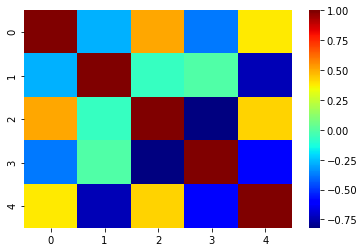

In [8]:
### print covariance matrix of features
from sklearn.covariance import EmpiricalCovariance
import seaborn as sns

cov = EmpiricalCovariance().fit(X)
print("covariance matrix: \n", cov.covariance_)
ax = sns.heatmap(cov.covariance_, cmap="jet")

In [9]:
# linear regression for phosphate
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X, y1)

print("score: ", reg1.score(X, y1))
print("coefficients: ", reg1.coef_)
print("intercept: ", reg1.intercept_)

score:  0.971710398172082
coefficients:  [ 0.01929322 -0.12161472 -0.04860182 -0.16335159  0.81213962]
intercept:  6.228159023909614e-16


In [10]:
# linear regression for silicate
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression().fit(X, y2)

print("score: ", reg2.score(X, y2))
print("coefficients: ", reg2.coef_)
print("intercept: ", reg2.intercept_)

score:  0.9325633166309341
coefficients:  [ 0.31173721 -0.77303846  0.30087839 -0.40742624 -0.31764804]
intercept:  -4.973195168882957e-15


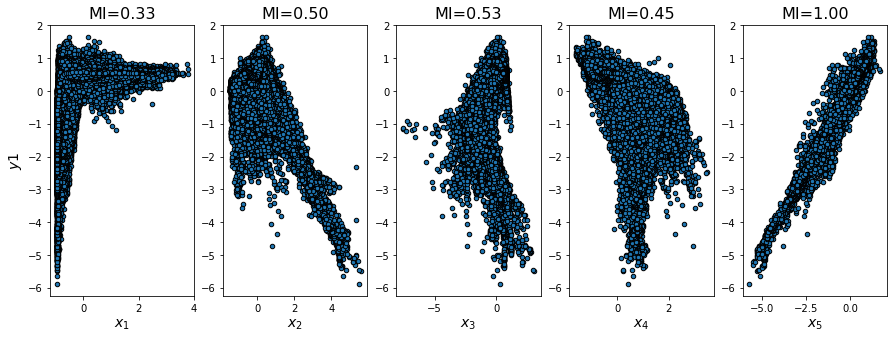

In [23]:
# see which features are most significant in predicting phosphate
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y1)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.scatter(X.iloc[:, i], y1, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y1$", fontsize=14)
    plt.title("MI={:.2f}".format(mi[i]),
              fontsize=16)
plt.show()

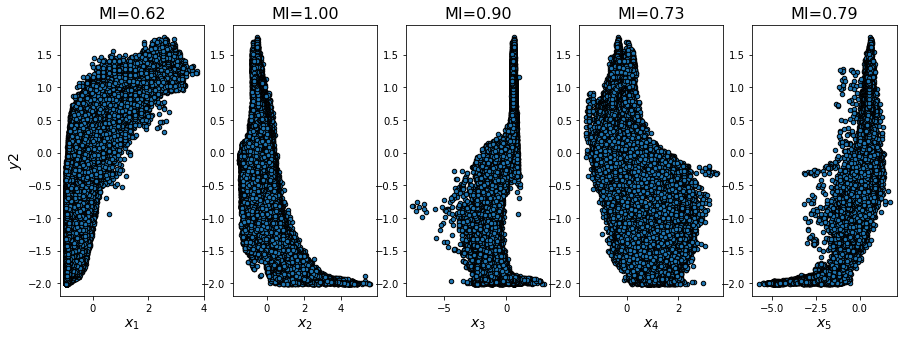

In [24]:
# see which features are most significant in predicting silicate

mi = mutual_info_regression(X, y2)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.scatter(X.iloc[:, i], y2, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y2$", fontsize=14)
    plt.title("MI={:.2f}".format(mi[i]),
              fontsize=16)
plt.show()